In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline


### import class wrapper

from classy import Class

### math stuff
import numpy as np
from scipy.optimize import fsolve

### Controlling iteration speed

from tqdm.notebook import trange, tqdm 

### plotting stuff
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cmasher as cmr
#import matplotlib.patheffects as path_effects

In [2]:
### INPUT ###
Omega_scf=0.0001#scalar field density parameter at present
kvec = np.logspace(-4,np.log10(3),1000)
#omega_gamma = 2.473e-5
#print(T_ncdm)
###
common_settings = {
                    'output': 'tCl,pCl,lCl,mPk',
                    'k_output_values':0.25*0.67810,
                    # 'lensing': 'yes',
                    # 'P_k_max_h/Mpc': 10, 
                    # LambdaCDM parameters
                   'h': 0.67810,
                   'omega_b': 0.02238280,
                   'omega_cdm': 0.1201075,
                   'Omega_scf': Omega_scf,
                #    'Omega_fld': 0,
                   'Omega_Lambda': 0.7,
                   'gauge': 'sync', 
                   #'evolver': 0,
                   }  

no_scalar = { 
                    'output': 'tCl,pCl,lCl,mPk',
                    'k_output_values':0.5*0.67810,
                    # 'lensing': 'yes',
                    # 'P_k_max_h/Mpc': 10, 
                    # LambdaCDM parameters
                   'h': 0.67810,
                   'omega_b': 0.02238280,
                   'omega_cdm': 0.1201075,
#                   'Omega_scf': Omega_scf,
                   'gauge': 'new', 
                   }  

In [3]:
### Run CLASS ###
ScalarCLASS = {}
alpha_lrm = [0., 1e-5, 1e-3, 1e-1] #[0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]#[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]#np.logspace(-3, -1, 10)
for alpha in alpha_lrm:
    ScalarCLASS[alpha] = Class()
    ScalarCLASS[alpha].set(common_settings)
    ScalarCLASS[alpha].set({
                    'scf_parameters': '0.0, 0.1, 0.0, 0.0, 0.0001, 0.0', #V = ((\phi-B)^\alpha + A)exp(-lambda*phi), [scf_lambda, scf_alpha, scf_A, scf_B, phi, phi_prime]
                    'attractor_ic_scf': 'no',
                    'alpha_lrm_1': alpha,
                    # 'alpha_lrm_2': 0, 
                    })
    ScalarCLASS[alpha].compute()


Not using attractor initial conditions
Inferred Omega0_lambda = 6.900260e-01 (including Omega0_scf = 1.646814e-11 for beta = 0.000000e+00)
Not using attractor initial conditions
Not using attractor initial conditions
Inferred Omega0_lambda = 6.900260e-01 (including Omega0_scf = 1.646814e-11 for beta = 0.000000e+00)
Not using attractor initial conditions
Not using attractor initial conditions
Inferred Omega0_lambda = 6.900260e-01 (including Omega0_scf = 1.646814e-11 for beta = 0.000000e+00)
Not using attractor initial conditions
Not using attractor initial conditions
Inferred Omega0_lambda = 6.900260e-01 (including Omega0_scf = 1.646814e-11 for beta = 0.000000e+00)
Not using attractor initial conditions


In [4]:
# LCDM = Class()
# LCDM.set(no_scalar)
# LCDM.compute()


In [5]:

bgScalar, z  = {}, {}
pbScalar, delta_cdm, tau, theta_cdm, phi_scf, dphi_scf,V_scf, a, delta_g, delta_scf, delta_b, psi, phi = {}, {}, {}, {}, {}, {},{}, {}, {}, {}, {}, {}, {}
### densities
rho_g, rho_scf, rho_cdm, rho_lambda = {}, {}, {}, {}
# pk = {}

for alpha in alpha_lrm:
    bgScalar[alpha] = ScalarCLASS[alpha].get_background()
    pbScalar[alpha] = ScalarCLASS[alpha].get_perturbations()
    delta_cdm[alpha] = pbScalar[alpha]['scalar'][0]['delta_cdm']
    delta_g[alpha] = pbScalar[alpha]['scalar'][0]['delta_g']
    delta_scf[alpha] = pbScalar[alpha]['scalar'][0]['delta_scf']
    delta_b[alpha] = pbScalar[alpha]['scalar'][0]['delta_b']
    theta_cdm[alpha] = pbScalar[alpha]['scalar'][0]['theta_cdm']
    psi[alpha] = pbScalar[alpha]['scalar'][0]['psi']
    phi[alpha] = pbScalar[alpha]['scalar'][0]['phi']
    phi_scf[alpha] = bgScalar[alpha]['phi_scf']
    dphi_scf[alpha] = bgScalar[alpha]["phi'_scf"]
    V_scf[alpha] = bgScalar[alpha]["V_scf"]
    one_k = pbScalar[alpha]['scalar'][0]     # this contains only the scalar perturbations for the requested k values
    a[alpha] = one_k['a']    # you can access the conformal time values  
    # compute derivative of phi with respect to a
    # pk_alpha = []
    # for k in kvec:
    #     pk_alpha.append(ScalarCLASS[alpha].pk(k,0.))
    # pk[alpha] = np.array(pk_alpha)
    
            
    z[alpha] = bgScalar[alpha]['z']
    ### Obtain the physical axion and photon energy densities.
    rho_g[alpha] = bgScalar[alpha]['(.)rho_g']
    rho_lambda[alpha] = bgScalar[alpha]['(.)rho_lambda']
    rho_scf[alpha] = bgScalar[alpha]['(.)rho_scf']
    rho_cdm[alpha] = bgScalar[alpha]['(.)rho_cdm']
    

# pbLCDM = LCDM.get_perturbations()
# delta_cdm_lcdm = pbLCDM['scalar'][0]['delta_cdm']
# theta_cdm_lcdm = pbLCDM['scalar'][0]['theta_cdm']
# delta_g_lcdm = pbLCDM['scalar'][0]['delta_g']
# delta_b_lcdm = pbLCDM['scalar'][0]['delta_b']
# a_lcdm = pbLCDM['scalar'][0]['a']



In [6]:
print(pbScalar[alpha_lrm[0]]['scalar'][0].keys())
print(bgScalar[alpha_lrm[0]].keys())

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_scf', 'theta_scf'])
dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_scf', '(.)p_scf', '(.)p_prime_scf', 'phi_scf', "phi'_scf", 'V_scf', "V'_scf", "V''_scf", '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [7]:
for alpha in alpha_lrm:
    Omega_lambda = rho_lambda[alpha][-1]/(rho_lambda[alpha][-1] + rho_cdm[alpha][-1] + rho_scf[alpha][-1] + rho_g[alpha][-1])
    print(f"alpha = {alpha}, Omega_lambda = {Omega_lambda}")

alpha = 0.0, Omega_lambda = 0.7253616470204411
alpha = 1e-05, Omega_lambda = 0.7253616470204411
alpha = 0.001, Omega_lambda = 0.7253616470204411
alpha = 0.1, Omega_lambda = 0.7253616470204411


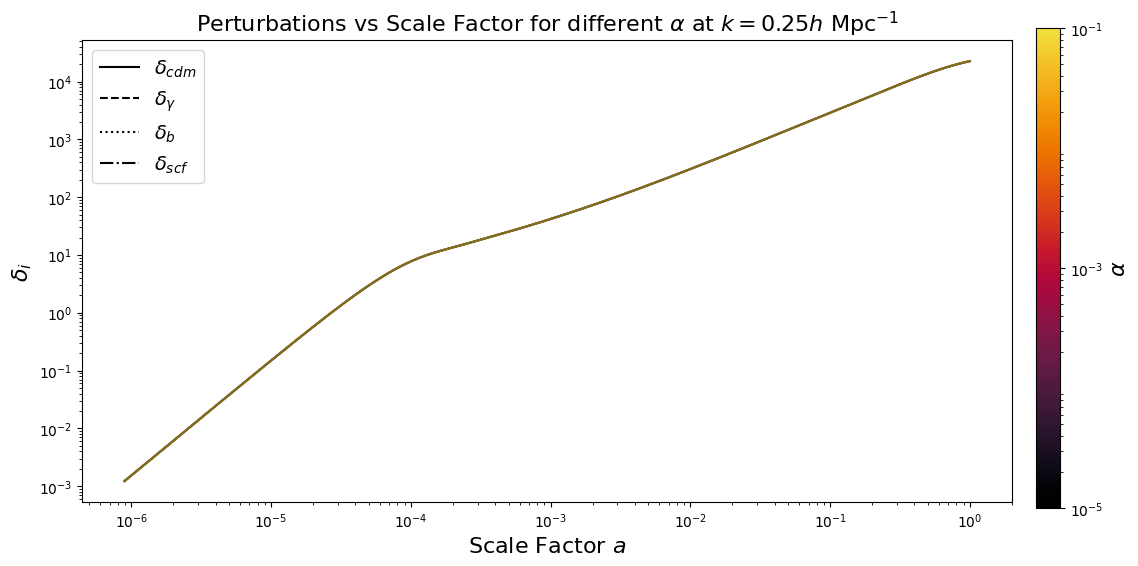

In [8]:
plt.figure(figsize=(12, 6))

# Define the colormap and normalization for the colorbar
norm = mcolors.LogNorm(vmin=min(alpha_lrm[1:]), vmax=max(alpha_lrm[1:]))  # Logarithmic normalization
cmap = cmr.ember # Use the Greys colormap

# Plot density contrasts for different alpha values
for alpha in alpha_lrm[1:]:
    color =  cmap(norm(alpha))  # Map alpha to a color using the normalized colormap
    plt.loglog(a[alpha], np.abs(delta_cdm[alpha]), color=color, label=rf'$\alpha={alpha}$')
    # print(f"alpha = {alpha}, delta_cdm = {delta_cdm[alpha][0]*4/3}")
    # plt.loglog(a[alpha], np.abs(delta_g[alpha]), color=color, linestyle='dashed')
    # print(f"alpha = {alpha}, delta_g = {delta_g[alpha][0]}")
    # plt.loglog(a[alpha], np.abs(delta_b[alpha]), color=color, linestyle='dotted')
    # plt.loglog(a[alpha], np.abs(delta_scf[alpha]), color=color, linestyle='dashdot', alpha=0.5)
    # print(f"alpha = {alpha}, delta_scf = {delta_scf[alpha][0]}")

# Plot LCDM density contrasts
plt.loglog(a[alpha_lrm[0]], np.abs(delta_cdm[alpha_lrm[0]]), color='black', label='LCDM', alpha=0.5)
# plt.loglog(a[alpha_lrm[0]], np.abs(delta_g[alpha_lrm[0]]), color='black', linestyle='dashed', alpha=0.5)
# plt.loglog(a[alpha_lrm[0]], np.abs(delta_b[alpha_lrm[0]]), color='black', linestyle='dotted', alpha=0.5)
# plt.loglog(a[alpha_lrm[0]], np.abs(delta_scf[alpha_lrm[0]]), color='black', linestyle='dashdot', alpha=0.5)
# plt.loglog(a_lcdm, np.abs(delta_g_lcdm), color='black', linestyle='dashed', alpha=0.5)
# plt.loglog(a_lcdm, np.abs(delta_b_lcdm), color='black', linestyle='dotted', alpha=0.5)

# Add a vertical line for reference
#plt.vlines(1e-3, 1e-4, 9e4, color='k', linestyle='dashed', alpha=0.5)

# Set plot labels, limits, and title
plt.ylabel(r'$\delta_{{i}}$', fontsize=16)
plt.xlabel(r'Scale Factor $a$', fontsize=16)
# plt.xlim(1e-5, 1.1)
#plt.ylim(1e-4, 9e4)
plt.title(r'Perturbations vs Scale Factor for different $\alpha$ at $k=0.25 h$ Mpc$^{-1}$', fontsize=16)

# Add custom legend for line styles
cdm_line = plt.Line2D((0, 1), (0, 0), color='k', linestyle='-')
photon_line = plt.Line2D((0, 1), (0, 0), color='k', linestyle='dashed')
baryon_line = plt.Line2D((0, 1), (0, 0), color='k', linestyle='dotted')
scalar_line = plt.Line2D((0, 1), (0, 0), color='k', linestyle='dashdot')
plt.legend([cdm_line, photon_line, baryon_line, 
            scalar_line
            ],
           [r'$\delta_{cdm}$', r'$\delta_{\gamma}$', r'$\delta_{b}$'
            , r'$\delta_{scf}$'
            ], fontsize=14)

# Add a colorbar for alpha values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=plt.axes([0.92, 0.1, 0.02, 0.8]))
cbar.set_label(r'$\alpha$', fontsize=16)
cbar.set_ticks(alpha_lrm[1:])


# # Ensure the colorbar has log-spaced ticks
# tick_values = np.logspace(np.log10(min(alpha_lrm)), np.log10(max(alpha_lrm)), num=5)
# cbar.set_ticks(tick_values)
# cbar.set_ticklabels([f"{val:.1e}" for val in tick_values])
# #cbar.set_ticks(alpha_lrm)

# Display the plot
plt.show()

In [9]:
# # Assuming alpha_lrm, a, delta_cdm, delta_g, delta_b, and delta_cdm_lcdm are predefined

# plt.figure(figsize=(12, 6))

# # Define the colormap and normalization for the colorbar
# norm = mcolors.LogNorm(vmin=min(alpha_lrm), vmax=max(alpha_lrm))  # Logarithmic normalization
# cmap = cmr.ember # Use the Greys colormap

# # Plot density contrasts for different alpha values
# for alpha in alpha_lrm:
#     color = cmap(norm(alpha))  # Map alpha to a color using the normalized colormap
#     plt.loglog(a[alpha], np.abs(psi[alpha]), color=color, label=rf'$\alpha={alpha}$')
#     plt.loglog(a[alpha], np.abs(phi[alpha]), color=color, linestyle='dashed')


# # Set plot labels, limits, and title
# #plt.ylabel(r'$\delta_{{i}}$', fontsize=16)
# plt.xlabel(r'Scale Factor $a$', fontsize=16)
# plt.xlim(1e-5, 1.1)

# # Add a colorbar for alpha values
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# cbar = plt.colorbar(sm, orientation='vertical')
# cbar.set_label(r'$\alpha$', fontsize=14)

# # Ensure the colorbar has log-spaced ticks
# tick_values = np.logspace(np.log10(min(alpha_lrm)), np.log10(max(alpha_lrm)), num=5)
# cbar.set_ticks(tick_values)
# cbar.set_ticklabels([f"{val:.1e}" for val in tick_values])
# #cbar.set_ticks(alpha_lrm)

# # Display the plot
# plt.show()

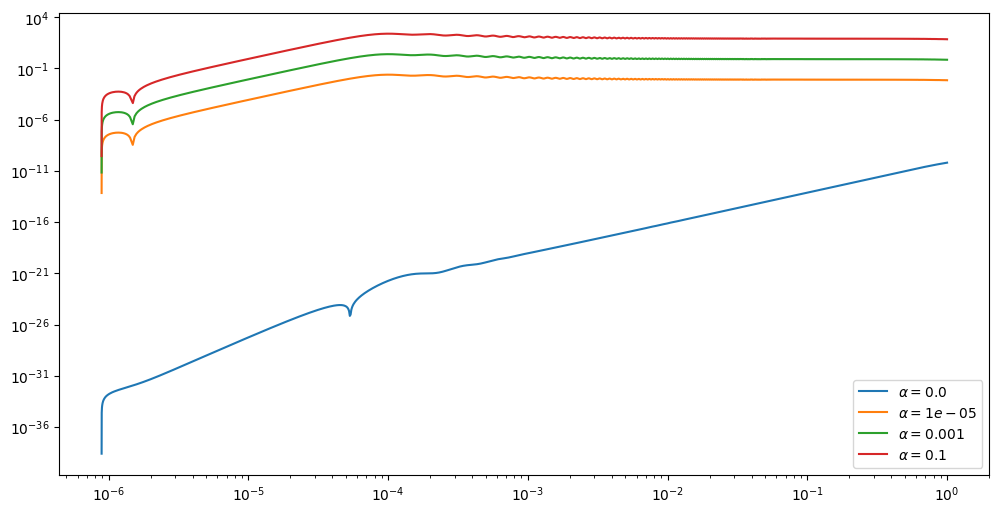

In [10]:
#plot delta_scf
plt.figure(figsize=(12, 6))

# Plot density contrasts for different alpha values
for alpha in alpha_lrm:
    plt.loglog(a[alpha], abs(delta_scf[alpha]), label=rf'$\alpha={alpha}$')
    plt.legend()
    # plt.xlim( [6e-5, 1e-3])

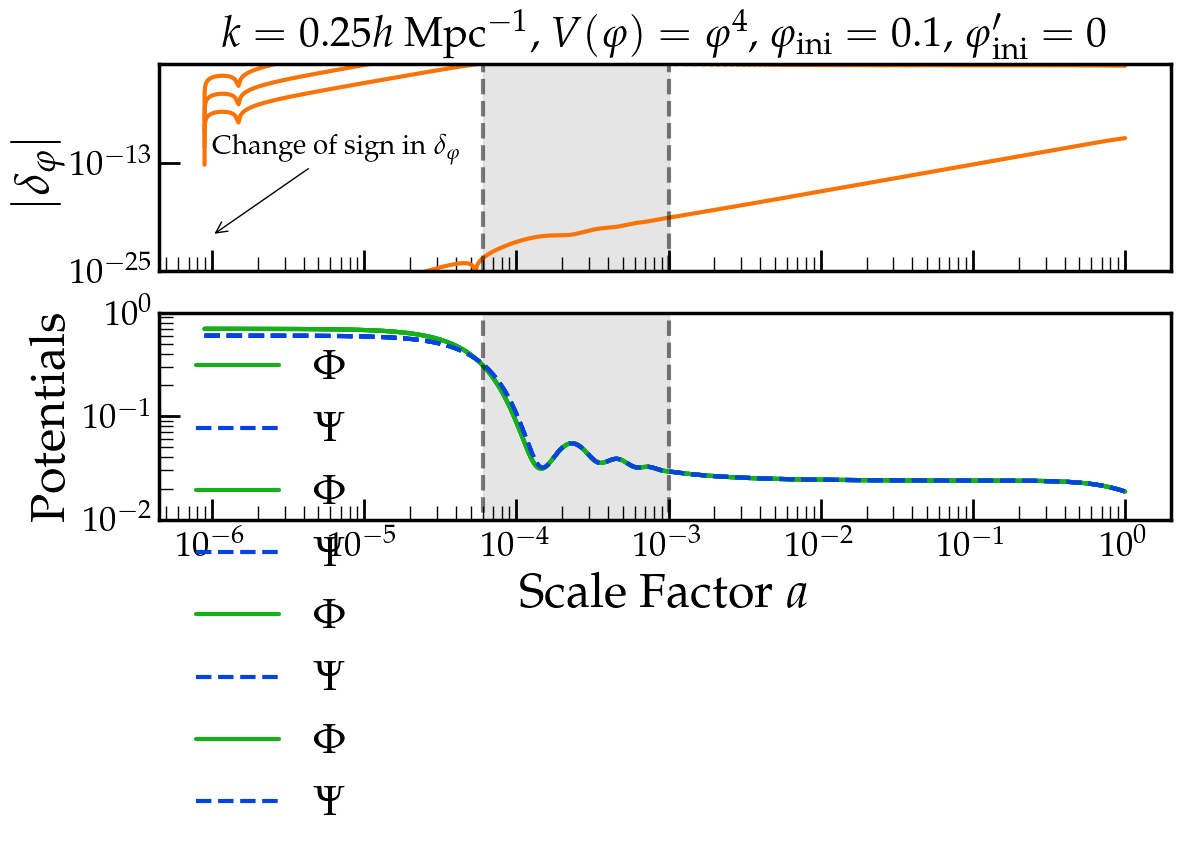

In [11]:
from matplotlib import patches
plt.style.use('/mnt/e/Workplace/sty.mplstyle')

# Create a figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

oscillations = [6e-5, 1e-3]

# First subplot (Density contrasts)
for alpha in alpha_lrm:
    axes[0].loglog(a[alpha], np.abs(delta_scf[alpha]), color='xkcd:orange', linestyle='-')

# Add labels, limits, and legend for the first subplot
axes[0].set_ylabel(r'$|\delta_{\varphi}|$', fontsize=35)
axes[0].set_ylim(1e-25, 1e-2)
axes[0].vlines(oscillations[0], 1e-25, 1e-2, color='k', linestyle='dashed', alpha=0.5)
axes[0].vlines(oscillations[1], 1e-25, 1e-2, color='k', linestyle='dashed', alpha=0.5)
#shade the region between the two vertical lines
axes[0].add_patch(patches.Rectangle((oscillations[0], 1e-25), oscillations[1]-oscillations[0], 1e-2, alpha=0.2, color='gray'))
axes[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
axes[0].tick_params(axis='y', which='both', left=True, right=False)
#annotate the weird dip in the beginning 
axes[0].annotate(r'Change of sign in $\delta_\varphi$', xy=(1e-6, 1e-21), xytext=(1e-6, 1e-12),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=20)


# Second subplot (Gravitational potential)
for alpha in alpha_lrm:
    axes[1].loglog(a[alpha], phi[alpha], color='xkcd:green', linestyle='-', label=rf'$\Phi$')
    axes[1].loglog(a[alpha], psi[alpha], color='xkcd:blue', linestyle='--', label=rf'$\Psi$')

# Add labels, limits, and legend for the second subplot
axes[1].set_xlabel(r'Scale Factor $a$', fontsize=35)
axes[1].set_ylabel(r'Potentials', fontsize=35)
axes[1].set_ylim(1e-2, 1.0)
axes[1].vlines(oscillations[0], 1e-3, 1.1, color='k', linestyle='dashed', alpha=0.5)
axes[1].vlines(oscillations[1], 1e-3, 1.1, color='k', linestyle='dashed', alpha=0.5)
axes[1].add_patch(patches.Rectangle((oscillations[0], 1e-2), oscillations[1]-oscillations[0], 1, alpha=0.2, color='gray'))
axes[1].tick_params(axis='x', which='both', bottom=True, top=False)
axes[1].tick_params(axis='y', which='both', left=True, right=False)
axes[1].legend()

axes[0].set_title(r"$k=0.25 h$ Mpc$^{-1}$, $V(\varphi)=\varphi^4$, $\varphi_\mathrm{ini}=0.1$, $\varphi'_\mathrm{ini}=0$", fontsize=30, pad=13)
# add some space between the title and the plot


# Adjust layout
fig.tight_layout(pad=0.5)
fig.subplots_adjust(hspace=0.2)

# Save and display
fig.savefig("perturbations.pdf")
plt.show()

In [12]:
# # plot delta_cdm as a function of a with different alpha values having different colors but using the same colormap
# plt.figure(figsize=(12, 6))

# # Use SymLogNorm for symmetric logarithmic scaling
# norm = mcolors.SymLogNorm(linthresh=1, vmin=min(alpha_lrm), vmax=max(alpha_lrm), base=10)
# cmap = cm.Reds  # Choose a diverging colormap

# for alpha in alpha_lrm:
#     color = cmap(norm(alpha))  # Map alpha to a color
#     plt.loglog(a[alpha], np.abs(theta_cdm[alpha]), color=color, label=rf'$\alpha={alpha}$')

# plt.loglog(a_lcdm, np.abs(theta_cdm_lcdm), color='black', label='LCDM')
# plt.ylabel(r'$\theta_{{cdm}}$', fontsize=16)
# plt.xlabel(r'a', fontsize=16)
# plt.xlim(1e-5, 1.1)

# # Add a colorbar for the alpha values
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='vertical')
# cbar.set_label(r'$\alpha$', fontsize=14)

# plt.legend()
# plt.show()


(0.0, 250.0)

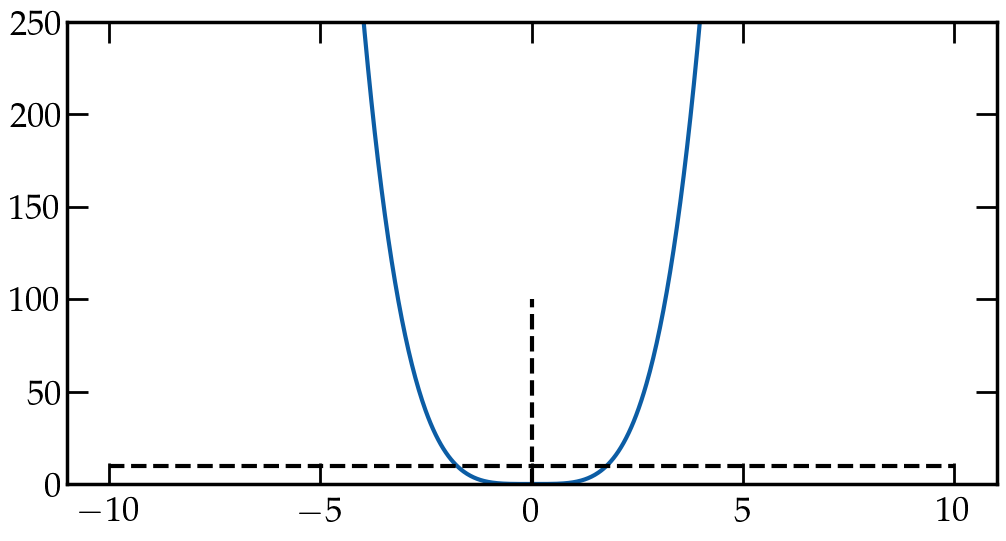

In [13]:
#Potential (\phi-B)^\alpha + A)exp(-lambda*phi)

def V(phi, lam, alpha, A, B):
    #return ((phi-B)**alpha + A)*np.exp(-lam*phi)
    return lam*phi**2/2 + alpha*phi**4

phi = np.linspace(-10, 10, 1000)
plt.figure(figsize=(12, 6))


plt.plot(phi, V(phi, 0.0, 1, 0, 0), label=r'$\alpha=1$')
plt.hlines(10, -10, 10, color='black', linestyle='dashed')
plt.vlines(0, 0, 100, color='black', linestyle='dashed')
plt.ylim(0, 250)

/tmp/ipykernel_76033/2437447465.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1e7)


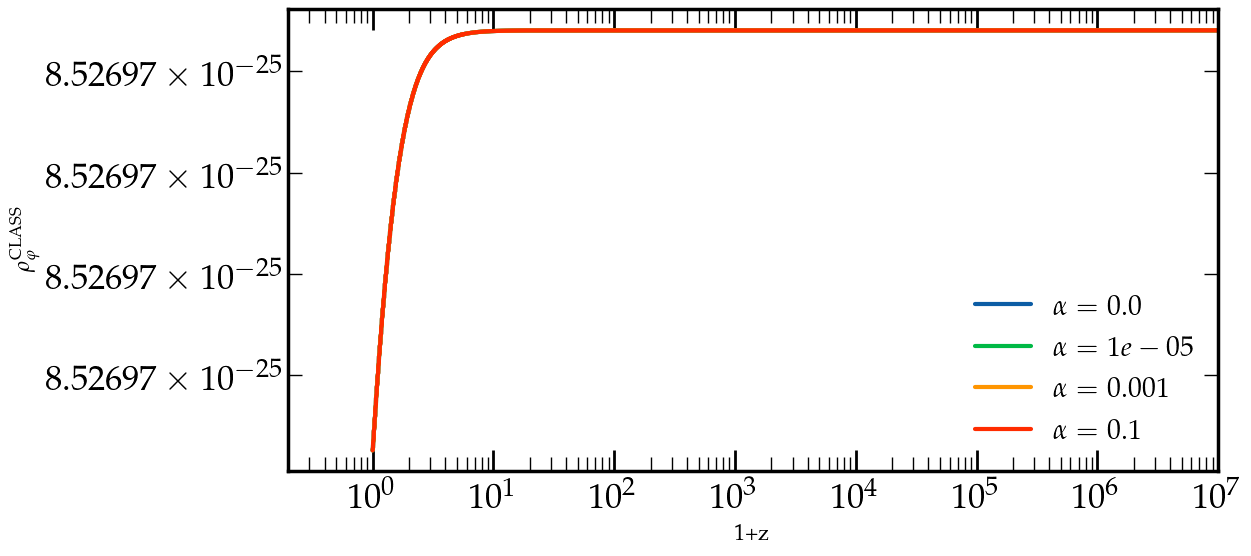

In [14]:
plt.figure(figsize=(12, 6))

for alpha in alpha_lrm:
    plt.loglog(1+z[alpha], rho_scf[alpha], label=rf'$\alpha={alpha}$')
    plt.ylabel(rf'$\rho_\varphi^\mathrm{{CLASS}}$', fontsize=16)
plt.xlabel(r'1+z', fontsize=16)
plt.xlim(0, 1e7)
#plt.xlim(1e-1, 1e4)

plt.legend(fontsize=20)

(1e-05, 0.000105)

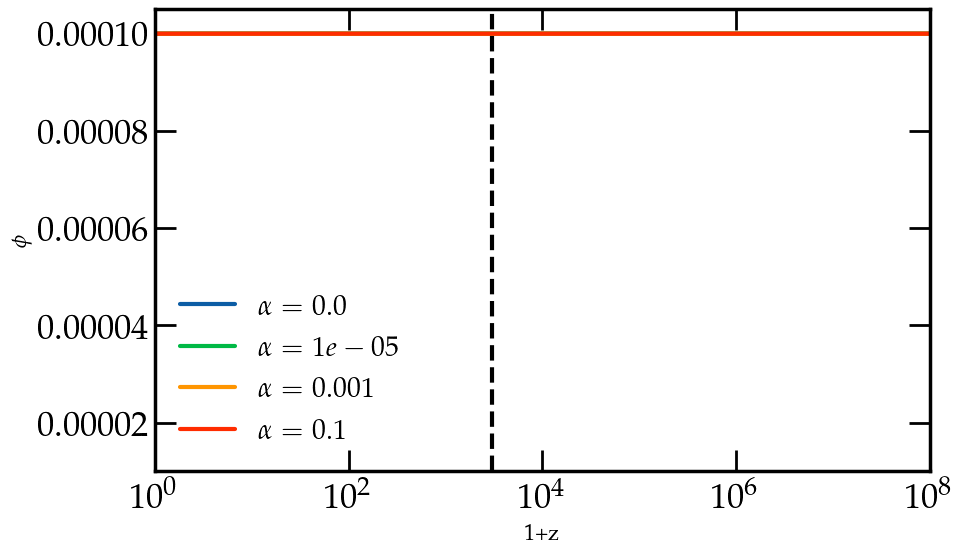

In [15]:
### plot evolution of the scalar field phi
plt.figure(figsize=(10, 6))
for alpha in alpha_lrm:
    plt.semilogx(1+z[alpha], phi_scf[alpha], label=rf'$\alpha={alpha}$')
    plt.ylabel(rf'$\phi$', fontsize=16)
plt.legend(fontsize=20)
plt.vlines(3001, 0.00001,  0.000105, color='black', linestyle='dashed') 
plt.xlabel(r'1+z', fontsize=16)
plt.xlim(1, 1e8)
plt.ylim(0.00001, 0.000105)

    